# Chapter 2 :  2차원 벡터로 그림 그리기

----------------------

## 2.1 2차원 벡터 그리기

### draw 함수를 사용해 공룡 그림의 점들을 플로팅(plotting)하기

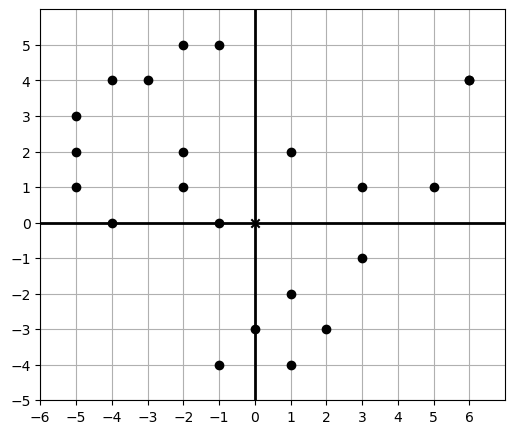

In [2]:
from vector_drawing import*
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3), (-5,2), (-2,2), (-5,1), 
                (-4,0), (-2,1), (-1,0), (0,-3), (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1), (6,4)]

draw(Points(*dino_vectors)) 

### 함수를 21번 호출해서 얻은 21개의 선분으로 완성한 공룡의 윤곽선

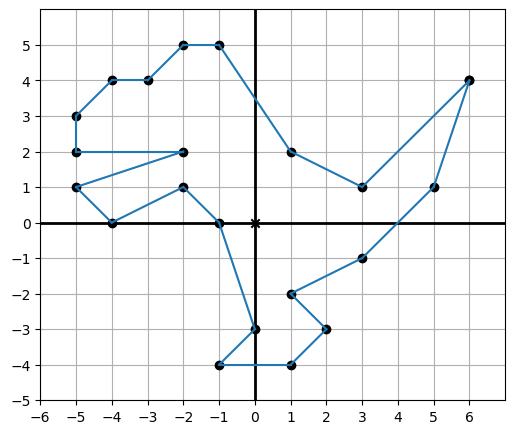

In [3]:
draw(Points(*dino_vectors), Segment((6,4),(3,1)),
    Segment((3,1),(1,2)),
    Segment((1,2),(-1,5)),
    Segment((-1,5),(-2,5)),
    Segment((-2,5),(-3,4)),
    Segment((-3,4),(-4,4)),
    Segment((-4,4),(-5,3)),
    Segment((-5,3),(-5,2)),
    Segment((-5,2),(-2,2)),
    Segment((-2,2),(-5,1)),
    Segment((-5,1),(-4,0)),
    Segment((-4,0),(-2,1)),
    Segment((-2,1),(-1,0)),
    Segment((-1,0),(0,-3)),
    Segment((0,-3),(-1,-4)),
    Segment((-1,-4),(1,-4)),
    Segment((1,-4),(2,-3)),
    Segment((2,-3),(1,-2)),
    Segment((1,-2),(3,-1)),
    Segment((3,-1),(5,1)),
    Segment((5,1),(6,4)),
    )

### 연습문제

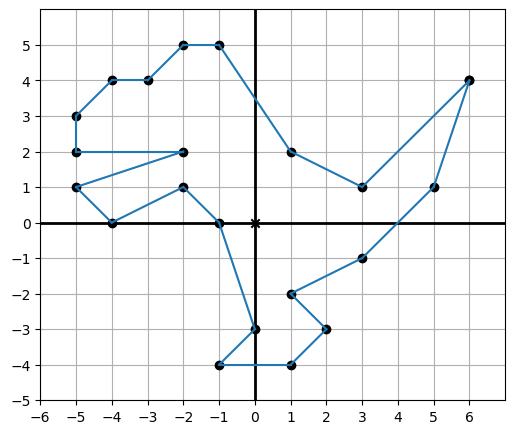

In [4]:
# 2.4
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

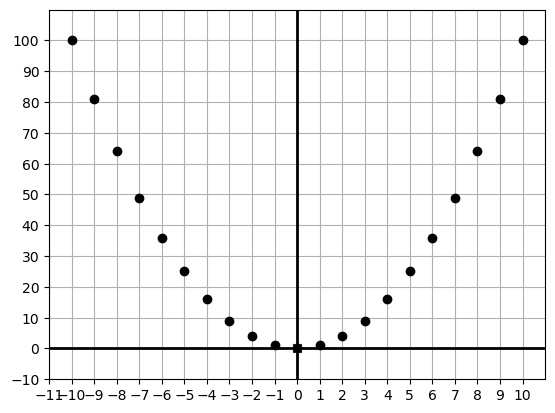

In [5]:
# 2.6
draw(
    Points(*[(x,x**2) for x in range(-10, 11)]),
    grid = (1,10),  # 1단위당 수직 격자선을 그린다.
    nice_aspect_ratio = False   #  x축과 y축 척도를 동일하게 설정할 필요가 없음
)

------------------------------------------

## 2.2 평면벡터 산술

In [19]:
def add(v1, v2):
    return(v1[0] + v2[0], v1[1] + v2[1])

In [20]:
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

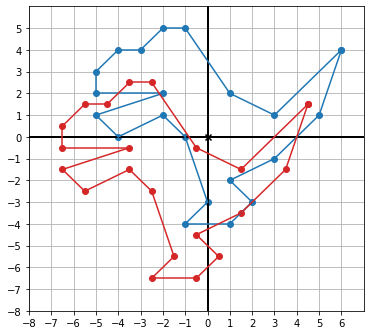

In [21]:
draw(
    Points(*dino_vectors, color = blue),
    Polygon(*dino_vectors, color = blue),
    Points(*dino_vectors2, color = red),
    Polygon(*dino_vectors2, color = red)
)

In [11]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

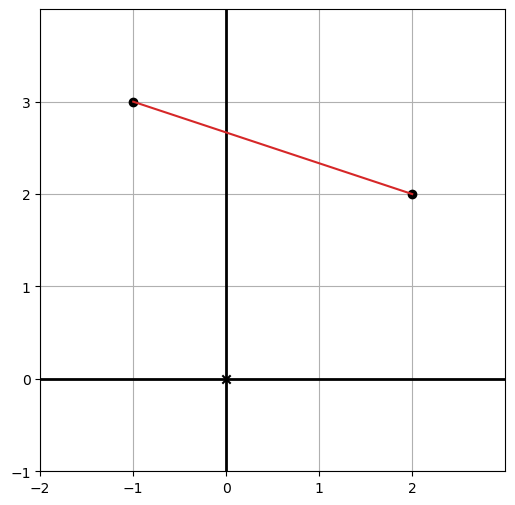

In [12]:
# v-w의 좌표는 v와 w의 좌표 간 차이
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color = red)
)

### 연습문제

In [13]:
# 2.7
def add(*vectors):
    return(sum([v[0] for v in vectors]), sum(v[1] for v in vectors))

In [14]:
# 2.8
def translate(translation, vectors):
    return[add(translation, v) for v in vectors]

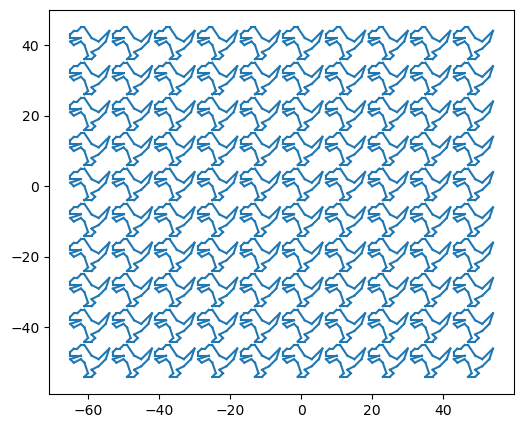

In [15]:
# 2.11
def hundred_dinos():
    translations = [(12*x,10*y) for x in range(-5,5) for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors),color=blue) for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)
hundred_dinos()

In [16]:
# 2.15
max(dino_vectors, key = length)

(6, 4)

In [17]:
# 2.17
def scale(scalar, v):
    return(scalar * v[0], scalar * v[1])

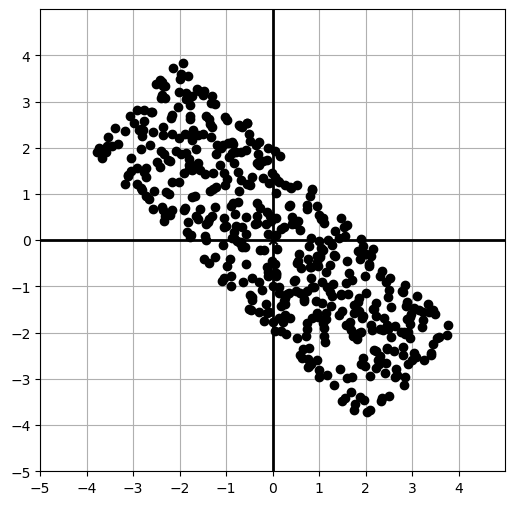

In [18]:
# 2.19
from random import uniform
u = (-1, 1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s():
    return uniform(-1,1)
possibilities = [add(scale(random_r(), u), scale(random_s(), v)) for i in range(0,500)]
draw(Points(*possibilities))

In [19]:
# 2.24
def subtract(v1, v2):
    return(v1[0] - v2[0], v1[1] - v2[1])

In [21]:
# 2.25
def distance(v1, v2):
    return length(subtract(v1, v2))

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)]) for i in range(0, len(vectors))]
    return sum(distances)

print(perimeter([(1,0), (1,1), (0,1), (0,0)]))
print(perimeter(dino_vectors))

4.0
44.77115093694563


In [22]:
# 2.26
for n in range(-12,15):
    for m in range(-14,13):
        if distance((n,m), (1,-1)) == 13 and n>m>0:
            print((n,m))

(13, 4)


-----------------------------

## 2.3 평면의 각과 삼각법

In [23]:
from math import tan
tan(45)

1.6197751905438615

In [24]:
from math import tan, pi
tan(pi/4)

0.9999999999999999

### 데카르트 좌표 찾는 함수

In [25]:
from math import sin, cos
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return(length*cos(angle), length*sin(angle))

In [26]:
from math import pi
angle = 37 * pi / 180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [27]:
from math import asin
sin(1)

0.8414709848078965

In [28]:
asin(0.8414709848078965)

1.0

In [29]:
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [30]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [31]:
-2/sqrt(13)

-0.5547001962252291

In [32]:
3/sqrt(13)

0.8320502943378437

In [33]:
cos(2.1587989303424644)

-0.5547001962252293

In [34]:
sin(2.1587989303424644)

0.8320502943378435

In [35]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [36]:
from math import atan
atan(3)

1.2490457723982544

### 데카르트 좌표를 극좌표로 변환

In [37]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return(length(vector), angle)

In [38]:
to_polar((1,0))

(1.0, 0.0)

In [39]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

### 연습문제

In [40]:
# 2.27
length((-1.34, 2.68))

2.9963310898497184

In [41]:
# 2.28
tan(22*pi/180)

0.4040262258351568

In [49]:
# 2.32
print(sin(30*pi/180))
print(cos(30*pi/180))
print(tan(30*pi/180))

0.49999999999999994
0.8660254037844387
0.5773502691896257


In [45]:
# 2.35
print(tan(116.58*pi/180))
print(tan(2.035))

-1.998696149439318
-1.9972227673316139


In [46]:
# 2.36
from math import pi, cos, sin
print(sin(10*pi/6))
print(cos(10*pi/6))

-0.8660254037844386
0.5000000000000001


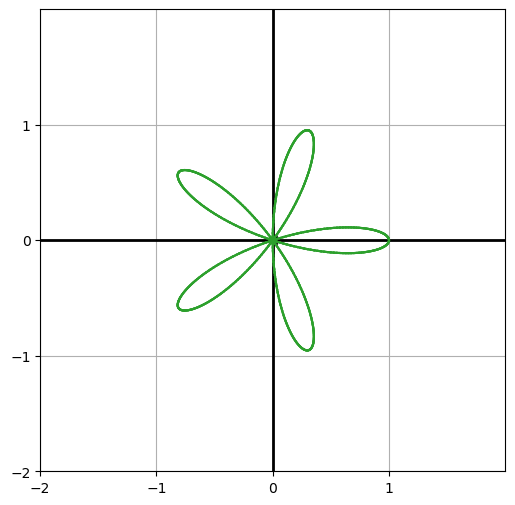

In [47]:
# 2.37
polar_coods = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1001)]
vectors = [to_cartesian(p) for p in polar_coods]
draw(Polygon(*vectors, color = green))

In [51]:
# 2.38
from math import tan, pi
pi, pi/2

(3.141592653589793, 1.5707963267948966)

In [52]:
tan(1.8)

-4.286261674628062

In [53]:
tan(2.5)

-0.7470222972386602

In [54]:
tan(2.1)

-1.7098465429045075

In [55]:
tan(2.2)

-1.3738230567687948

In [56]:
tan(2.15)

-1.5289797578045667

In [57]:
tan(2.16)

-1.496103541616277

In [58]:
tan(2.158)

-1.5025996395625056

In [59]:
tan(2.159)

-1.4993467206361923

In [60]:
# 2.39
from math import atan
atan(-3/2)

-0.982793723247329

---------------------------------

## 2.4 벡터 집합 변환하기

### 벡터 회전

draw함수는 데카르트 좌표만을 이해할 수 있으므로, 극좌표를 데카르트 좌표로 변환해야 한다.  
마찬가지로 극좌표에서 벡터를 회전하는 방법을 알고 있으므로, 회전이동을 수행하기 전에 데카르트 좌표를 극좌표로 변환할 필요가 있다.

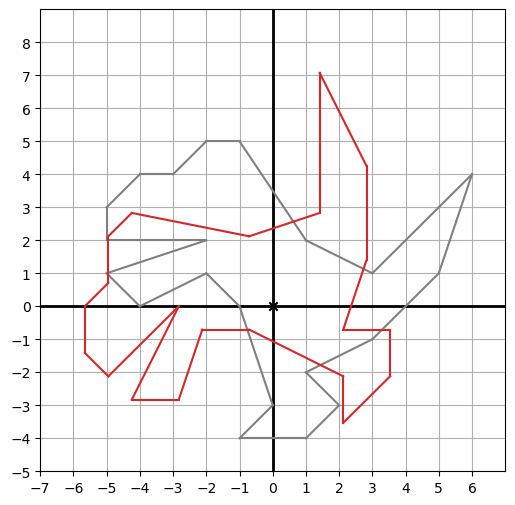

In [61]:
rotation_angle = pi/4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l, angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]
draw(
    Polygon(*dino_vectors, color = gray),
    Polygon(*dino_rotated, color = red))

### 연습문제

In [62]:
# 2.42
def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

In [67]:
new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))

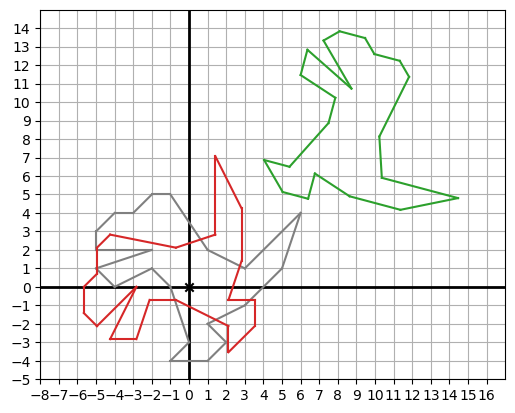

In [68]:
draw(
    Polygon(*dino_vectors, color = gray),
    Polygon(*dino_rotated, color = red),
    Polygon(*new_dino, color = green))

In [69]:
# 2.43
def regular_polygon(n):
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

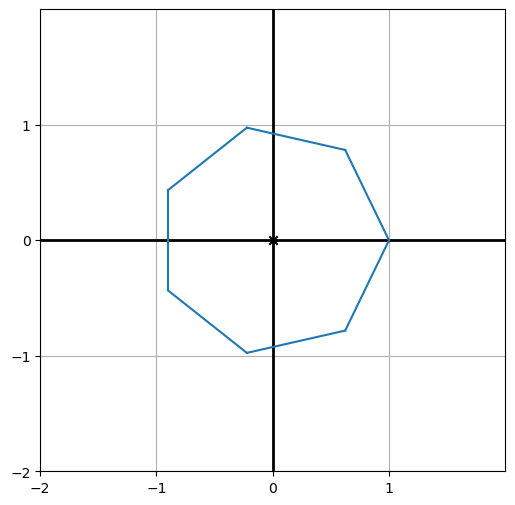

In [70]:
# 원점을 기준으로 같은 간격의 각을 갖는 점들로 이루어진 정칠각형
draw(
    Polygon(*regular_polygon(7))
)

In [71]:
# 2.44
new2_dino =  rotate(5 * pi/3, translate((8,8), dino_vectors))

In [72]:
dino_vectors[0]

(6, 4)

In [73]:
def translate(translation, vectors):
    return[add(translation, v) for v in vectors]

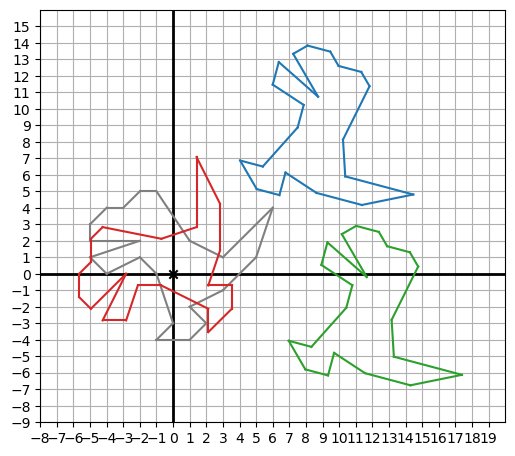

In [74]:
draw(
    Polygon(*dino_vectors, color = gray),
    Polygon(*dino_rotated, color = red),
    Polygon(*new_dino, color = blue),
    Polygon(*new2_dino, color = green))